Interacting Proteins

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [3]:
gbm = cptac.Gbm()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [4]:
ip = u.get_interacting_proteins('PTEN')
len(ip)

28

In [5]:
gene = 'PTEN'

In [6]:
mut_type_gbm = gbm.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderso

Deletion          81
Wildtype_Tumor    16
Name: Mutation, dtype: int64

In [7]:
cols = list(del_wt.columns[:-1])

u.wrap_ttest(del_wt, 'Mutation', cols)#, return_all = True)


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


,Comparison,P_Value
0,PTEN_proteomics,1.219523e-07
1,PIK3CD_proteomics,1.030815e-03
2,PIK3C3_proteomics,1.225949e-03


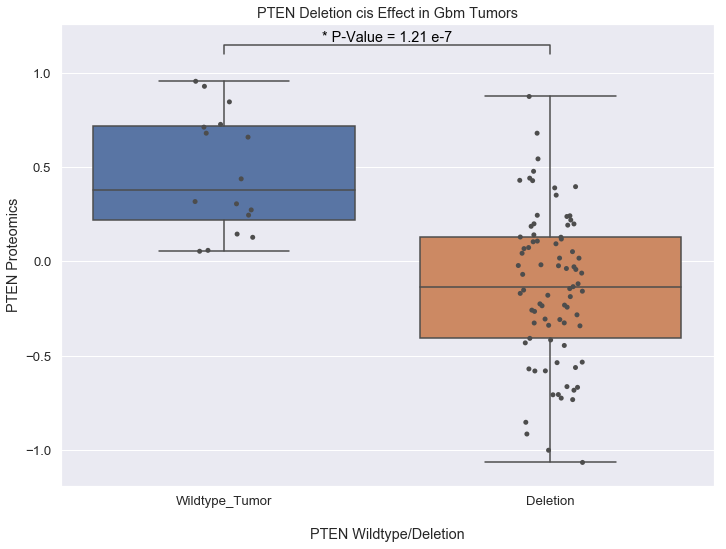

In [8]:
#cis
gene = 'PTEN'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion cis Effect in Gbm Tumors')
boxplot = sns.stripplot(x='Mutation', y=gene+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = gene+' Proteomics')

format_pval_annotation('* P-Value = 1.21 e-7', 0, 1, 1.1)

plt.show()
plt.clf()
plt.close()

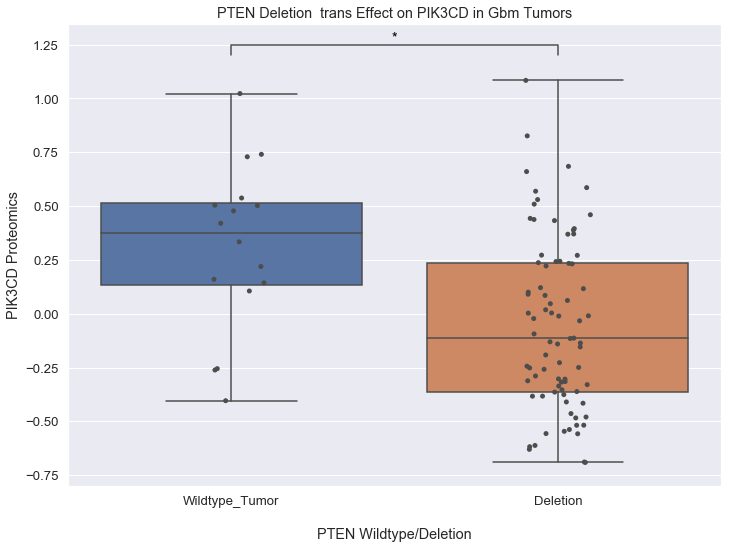

In [9]:
#trans
g = 'PIK3CD'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Gbm Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('*', 0, 1, 1.2)

plt.show()
plt.clf()
plt.close()

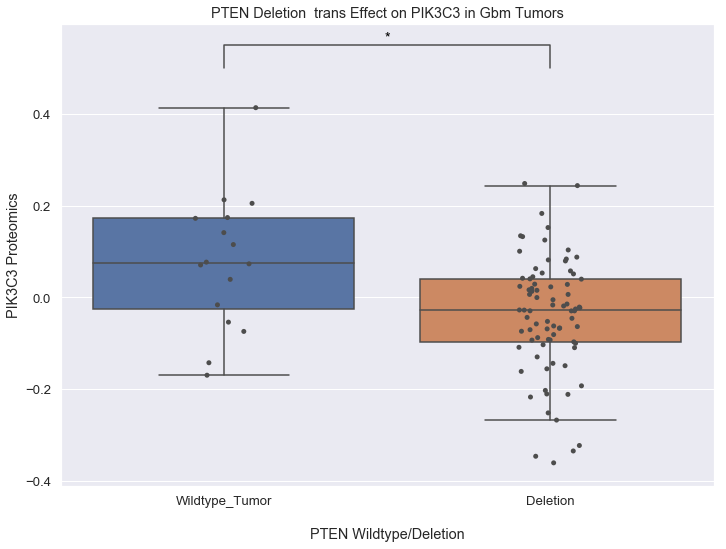

In [10]:
#trans
g = 'PIK3C3'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Gbm Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('*', 0, 1, .5)

plt.show()
plt.clf()
plt.close()

In [11]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

gbm_d = {}

for prot in ip:
    dif_gbm = wt_med[prot+'_proteomics'] - del_med[prot+'_proteomics']
    gbm_d[prot] = dif_gbm
    print(wt_med[prot+'_proteomics'], '-', del_med[prot+'_proteomics'], '=',dif_gbm)

gbm_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Gbm'])
gbm_df

0.0163009576993353 - -0.111383938857914 = 0.1276848965572493
-0.0147918343302386 - -0.1386659877478385 = 0.1238741534175999
-0.0382674147317096 - -0.06684363134069535 = 0.028576216608985745
-0.00987469878575539 - 0.005554595026846701 = -0.015429293812602092
-0.027524060621884994 - 0.07499388633124805 = -0.10251794695313304
-0.0223080811319969 - -0.125146265124997 = 0.1028381839930001
-0.168733568846353 - 0.12105467881072285 = -0.28978824765707584
nan - nan = nan
-0.00498213573323801 - -0.1166825296929105 = 0.11170039395967249
-0.0498033575660429 - 0.055942214345554256 = -0.10574557191159716
0.0245497264275627 - -0.23208031578778052 = 0.25663004221534325
0.656314061241077 - -0.3447209772423815 = 1.0010350384834585
-0.0469729333507834 - -0.0042531051254434005 = -0.04271982822534
-0.0345298985675673 - -0.12783881411458953 = 0.09330891554702223
-0.013634618106999 - -0.16766962179829398 = 0.15403500369129497
0.0129543561501723 - -0.07601238814827525 = 0.08896674429844756
-0.133809478985261 

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Gbm
MDM2,0.127685
CSNK2A1,0.123874
PDGFRB,0.028576
PIK3R2,-0.015429
PIK3C3,-0.102518
CSNK2A2,0.102838
SLC9A3R1,-0.289788
PIK3R3,NaN
USP13,0.111700
PIK3CA,-0.105746
